<a href="https://colab.research.google.com/github/SyedAhmadShaan/OpenAI-Agents-SDK/blob/main/Challenge_Project_Agentic_Patterns_with_OpenAI_Agents_SDK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!pip install -Uq openai-agents tavily-python

In [86]:
import nest_asyncio
nest_asyncio.apply()

In [87]:
import os
from agents import Agent, Runner, AsyncOpenAI, OpenAIChatCompletionsModel, set_tracing_disabled
from google.colab import userdata

set_tracing_disabled(True)
gemini_api_key = userdata.get("GOOGLE_API_KEY")
search_api_key = userdata.get("tvly_API_KEY")

#Reference: https://ai.google.dev/gemini-api/docs/openai
external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)

model = OpenAIChatCompletionsModel(
    model="gemini-2.0-flash",
    openai_client=external_client
)

In [88]:
from agents.tool import function_tool
@function_tool
def web_dev(topic: str) -> str:
    if "react" in topic.lower():
        return "React is a JavaScript library for building user interfaces. You can start by creating components and using JSX."
    elif "css" in topic.lower():
        return "CSS is used to style HTML elements. Learn about selectors, box model, flexbox, and grid."
    elif "api" in topic.lower():
        return "In web development, APIs allow communication between client and server. You can use Fetch or Axios in the frontend to call REST APIs."
    else:
        return "Can you clarify your web development question? Mention React, CSS, or API for targeted advice."

In [89]:
web_dev_agent = Agent(
    name="Web Dev Agent",
    instructions="You answer about web development",
    tools=[web_dev],
    model=model
)

In [90]:
@function_tool
def mob_dev(topic: str) -> str:
    if "flutter" in topic.lower():
        return "Flutter is a cross-platform UI toolkit by Google. You write apps using Dart and compile to native code for Android and iOS."
    elif "react native" in topic.lower():
        return "React Native lets you build mobile apps using JavaScript and React. It supports Android and iOS with native performance."
    elif "android" in topic.lower():
        return "Android development typically uses Kotlin or Java with Android Studio. Jetpack Compose is now preferred for UI."
    elif "ios" in topic.lower():
        return "iOS development is done using Swift and Xcode. SwiftUI is the recommended framework for building UIs."
    else:
        return "Please specify a mobile framework or platform like Flutter, React Native, Android, or iOS."


In [91]:
mob_dev_agent = Agent(
    name="Mob Dev Agent",
    instructions="You answer about mobile development",
    tools=[mob_dev],
    model=model
)

In [92]:
from agents.tool import function_tool
from tavily import TavilyClient

@function_tool
def dev_op(query: str):
  """Search online for the given query."""
  tavily_client = TavilyClient(api_key=search_api_key)
  response = tavily_client.search(query)
  return response

@function_tool
def openai(query: str):
  """Search online for OpenAI SDK."""
  tavily_client = TavilyClient(api_key=search_api_key)
  response = tavily_client.search(query)
  return response



In [93]:
devops_agent = Agent(
    name="DevOps Agent",
    instructions="You answer about DevOps",
    tools=[dev_op],
    model=model
)

In [94]:
openai_agent = Agent(
    name="OpenaAI Agent",
    instructions="You answer about OpenAI Agents",
    tools=[openai],
    model=model
)

In [124]:
agentic_ai = Agent(
    name="Agentic AI",
    instructions="You are expert in agentic ai. If user asks anything about devOps or OpenAI usethe appropriate tools",
    tools=[
        devops_agent.as_tool(tool_name="devops", tool_description="Specialized in DevOps"),
        openai_agent.as_tool(tool_name="openai", tool_description="Specialized in OpenAI")
    ],
    model=model
)


In [125]:
panacloud = Agent(
    name="Panacloud",
    instructions= "Answer student questions about web development, mobile development if it's about devops or openai handoff to agntic ai ",
    model=model,
    tools=[
        web_dev_agent.as_tool(tool_name="web_dev",
                             tool_description="Specialized in web development"
                             ),
        mob_dev_agent.as_tool(tool_name="mob_dev",
                             tool_description="Specialized in mobile development"
                             ),
    ],
    handoffs=[agentic_ai]

)

In [31]:
!pip install -q "openai-agents[viz]"

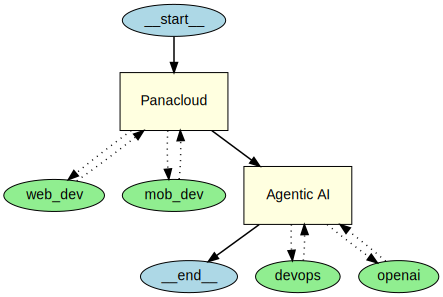

In [126]:
from agents.extensions.visualization import draw_graph

draw_graph(panacloud)

In [127]:
response = Runner.run_sync(panacloud, "explain briefly devOps")

print(f"**{response.last_agent.name}**:\n\n {response.final_output}")

**Panacloud**:

 DevOps is a set of practices that combines software development (Dev) and IT operations (Ops). It aims to shorten the systems development life cycle and provide continuous delivery with high software quality.

